# Step 1.1: Data Collection


This line installs the necessary Python packages:
- yfinance: to fetch historical stock data.
- pandas: for data manipulation.
- numpy: for numerical operations.
- matplotlib: for plotting graphs.

In [1]:
# Install necessary libraries
!pip install yfinance pandas numpy matplotlib

2. Importing Packages and Downloading Stock Data


*   tickers: List of selected stocks — Apple, Microsoft, Google, Amazon, and Tesla.
*   yf.download: Downloads historical stock price data (only the ‘Close’ price).
*   data.head(): Displays the first few rows of closing prices.


In [2]:
# Import required packages
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define your stock tickers and time frame
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']
start_date = '2020-01-01'
end_date = '2023-12-31'

# Download the data
data = yf.download(tickers, start=start_date, end=end_date)['Close']

# Show the first few rows
data.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  5 of 5 completed


Ticker,AAPL,AMZN,GOOGL,MSFT,TSLA
Date,,,,,
2020-01-02,72.716064,94.900497,68.108376,153.323227,28.684000
2020-01-03,72.009148,93.748497,67.752075,151.414124,29.534000
2020-01-06,72.582909,95.143997,69.557945,151.805466,30.102667
2020-01-07,72.241562,95.343002,69.423592,150.421341,31.270666
2020-01-08,73.403633,94.598503,69.917725,152.817368,32.809334


# Step 1.2: Efficient Frontier

3. Calculating Returns and Preparing for Portfolio Simulation

*   returns: Computes daily returns as percentage changes
*   mean_returns: Average daily return per stock.
*   cov_matrix: Covariance matrix showing how returns move relative to each other.
*   num_portfolios: Number of random portfolios to simulate.
*   risk_free_rate: Used to calculate the Sharpe ratio (typically from government bonds).

Mean-Variance Optimization

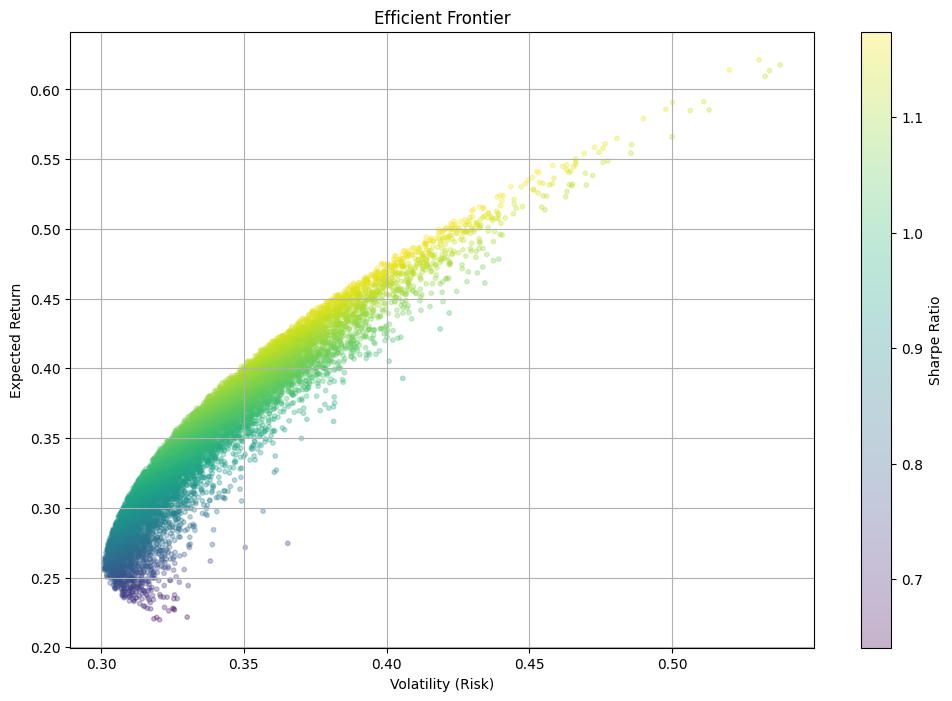

In [3]:
# Calculate daily returns
returns = data.pct_change().dropna()

# Mean returns and covariance matrix
mean_returns = returns.mean()
cov_matrix = returns.cov()

# Set number of portfolio simulations
num_portfolios = 10000
risk_free_rate = 0.01  # 1% annual risk-free rate

# Initialize results array
results = np.zeros((3, num_portfolios))
weights_record = []

for i in range(num_portfolios):
    # Random weights for each asset
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)

    # Save weights
    weights_record.append(weights)

    # Portfolio return and volatility
    portfolio_return = np.sum(mean_returns * weights) * 252  # annualized
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix * 252, weights)))  # annualized

    # Sharpe Ratio
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_std_dev

    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    results[2,i] = sharpe_ratio

# Convert results to DataFrame for plotting
results_frame = pd.DataFrame(results.T, columns=['Return', 'Risk', 'Sharpe Ratio'])

# Plot Efficient Frontier
plt.figure(figsize=(12, 8))
plt.scatter(results_frame['Risk'], results_frame['Return'], c=results_frame['Sharpe Ratio'], cmap='viridis', marker='o', s=10, alpha=0.3)
plt.colorbar(label='Sharpe Ratio')
plt.title('Efficient Frontier')
plt.xlabel('Volatility (Risk)')
plt.ylabel('Expected Return')
plt.grid(True)
plt.show()

# Step 1.3: Optimal Portfolio (Max Sharpe Ratio)

5. Plotting the Efficient Frontier

Optimal Portfolio Allocation:

AAPL: 25.13%
MSFT: 1.05%
GOOGL: 1.67%
AMZN: 19.69%
TSLA: 52.47%

Performance Metrics:
Expected Annual Return: 54.12%
Annual Volatility (Risk): 45.26%
Sharpe Ratio: 1.17


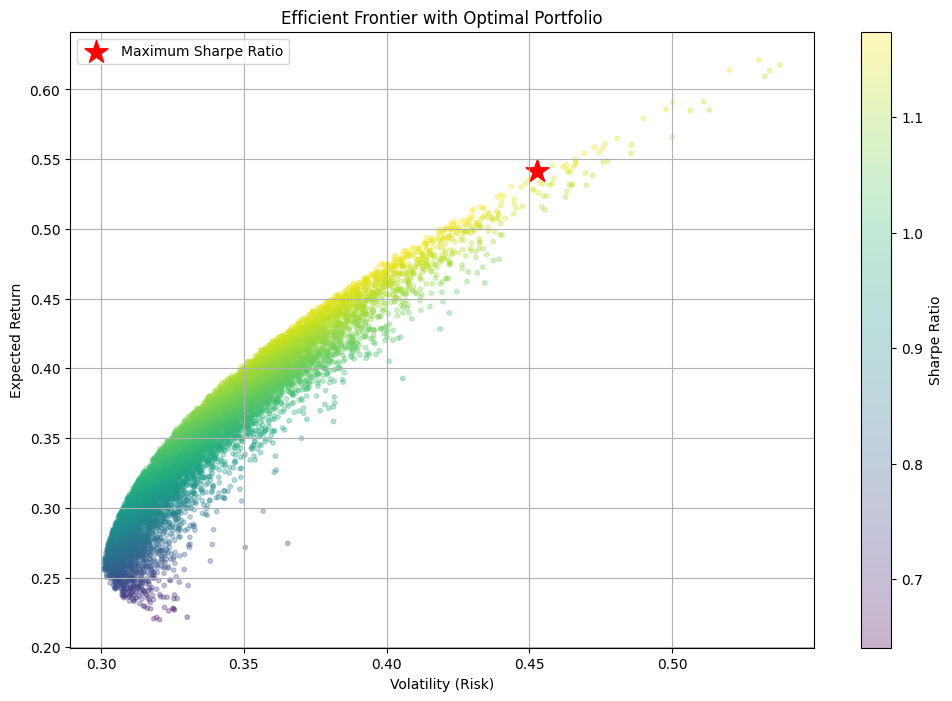

In [4]:
# Find the index of the portfolio with the maximum Sharpe Ratio
max_sharpe_idx = results_frame['Sharpe Ratio'].idxmax()
optimal_portfolio = results_frame.loc[max_sharpe_idx]
optimal_weights = weights_record[max_sharpe_idx]

# Display the optimal portfolio details
print("Optimal Portfolio Allocation:\n")
for ticker, weight in zip(tickers, optimal_weights):
    print(f"{ticker}: {weight:.2%}")

print("\nPerformance Metrics:")
print(f"Expected Annual Return: {optimal_portfolio['Return']:.2%}")
print(f"Annual Volatility (Risk): {optimal_portfolio['Risk']:.2%}")
print(f"Sharpe Ratio: {optimal_portfolio['Sharpe Ratio']:.2f}")

# Optional: Highlight this point on the efficient frontier
plt.figure(figsize=(12, 8))
plt.scatter(results_frame['Risk'], results_frame['Return'], c=results_frame['Sharpe Ratio'], cmap='viridis', alpha=0.3, s=10)
plt.colorbar(label='Sharpe Ratio')
plt.scatter(optimal_portfolio['Risk'], optimal_portfolio['Return'], color='red', marker='*', s=300, label='Maximum Sharpe Ratio')
plt.title('Efficient Frontier with Optimal Portfolio')
plt.xlabel('Volatility (Risk)')
plt.ylabel('Expected Return')
plt.legend()
plt.grid(True)
plt.show()

# Setup for Qiskit and IBM Quantum


7. Transition to Quantum Optimization (Qiskit Setup)

Installs Qiskit and required modules for quantum optimization:
- qiskit-aer: simulator
- qiskit-optimization: for formulating optimization problems
- qiskit-finance: includes finance-specific tools
- qiskit-algorithms: quantum algorithms like QAOA (Quantum Approximate Optimization Algorithm)

In [5]:
!pip -q install qiskit==1.3.1 qiskit-aer qiskit-algorithms qiskit-ibm-runtime pylatexenc
!pip install qiskit-optimization
!pip install qiskit-algorithms
!pip install qiskit-finance --quiet
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit_algorithms import QAOA
from qiskit.primitives import Sampler
from qiskit_finance.applications.optimization import PortfolioOptimization

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 90.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.5/310.5 kB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 78.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.0/353.0 kB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.9/434.9 kB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 60.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 69.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━

# Step 2.1: QUBO Formulation

8. Formulating the Optimization Problem
- Converts the classical optimization into a Quadratic Program suitable for quantum processing.
- budget = 4 means: out of 5 stocks, only 4 can be chosen.
- risk_factor controls risk appetite (0 = risk-taker, 1 = risk-averse).
- The problem is printed in a readable format with variables and constraints.

In [6]:
# Reuse returns and covariance matrix from earlier
mu = mean_returns.values
sigma = cov_matrix.values

# Set budget (number of assets to include in the portfolio)
budget = 4  # choose 4 assets out of 5

# Set risk factor (higher = more risk-averse)
risk_factor = 0.4  # adjust between 0 (no concern for risk) to 1 (fully risk-averse)

# Create the portfolio optimization problem
portfolio = PortfolioOptimization(expected_returns=mu, covariances=sigma, risk_factor=risk_factor, budget=budget)
qp = portfolio.to_quadratic_program()

# Display the problem
print(qp.prettyprint())

Problem name: Portfolio optimization

Minimize
  0.00017886007082675666*x_0^2 + 0.00025070676327272807*x_0*x_1
  + 0.0002470630747263304*x_0*x_2 + 0.00027006153679057996*x_0*x_3
  + 0.00037072766070524995*x_0*x_4 + 0.0002254577993437207*x_1^2
  + 0.00026653846238760306*x_1*x_2 + 0.0002649997069946984*x_1*x_3
  + 0.00037008889480585005*x_1*x_4 + 0.00017849063127854106*x_2^2
  + 0.00026826853369593006*x_2*x_3 + 0.0003104700688634957*x_2*x_4
  + 0.0001688521716812629*x_3^2 + 0.00033294543495291046*x_3*x_4
  + 0.0007362227344272486*x_4^2 - 0.00118656738109398*x_0
  - 0.000749814310678522*x_1 - 0.0009335249942573392*x_2
  - 0.0010946277265804255*x_3 - 0.0030697434984918513*x_4

Subject to
  Linear constraints (1)
    x_0 + x_1 + x_2 + x_3 + x_4 == 4  'c0'

  Binary variables (5)
    x_0 x_1 x_2 x_3 x_4



# Step 2.2  QAOA Setup and Execution (on Simulator)

Setting Up QAOA on Simulator
- 	COBYLA: A classical optimizer used to train QAOA.
- Sampler: Provides probability distribution over quantum measurement outcomes.
- QAOA: Quantum algorithm designed to solve combinatorial optimization problems.
  - reps=1: Depth of the QAOA circuit (can be increased for better accuracy).
  - random_seed: Ensures reproducible results.
- MinimumEigenOptimizer: A wrapper that uses QAOA to solve the quadratic program (qp) we formulated earlier.
- result: Contains the optimized binary vector (0 = asset excluded, 1 = included).

In [7]:
from qiskit_algorithms.optimizers import COBYLA
from qiskit_algorithms.utils import algorithm_globals
from qiskit_aer.primitives import Estimator as AerEstimator
from qiskit_aer.primitives import Sampler as AerSampler
from qiskit.primitives import Sampler as SamplerV1

sampler = SamplerV1()
qaoa = QAOA(sampler=sampler, optimizer=COBYLA(), reps=1)
# Set seed for reproducibility
algorithm_globals.random_seed = 42

# Create QAOA instance WITHOUT the `estimator` argument
qaoa = QAOA(sampler=SamplerV1(), optimizer=COBYLA(), reps=1)

# Define the portfolio optimization problem
mu = mean_returns.values
sigma = cov_matrix.values
budget = 4
risk_factor = 0.4


# Solve the problem
qaoa_solver = MinimumEigenOptimizer(qaoa)
result = qaoa_solver.solve(qp)

# Display solution
print("QAOA Result:", result)

# Show selected assets
selected_assets = [tickers[i] for i, val in enumerate(result.x) if val > 0.5]
print("\nSelected assets in optimal quantum portfolio:")
print(selected_assets)

<ipython-input-7-d4d9c515f788>:7: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = SamplerV1()
<ipython-input-7-d4d9c515f788>:13: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  qaoa = QAOA(sampler=SamplerV1(), optimizer=COBYLA(), reps=1)


QAOA Result: fval=-0.0032225016824752903, x_0=1.0, x_1=0.0, x_2=1.0, x_3=1.0, x_4=1.0, status=SUCCESS

Selected assets in optimal quantum portfolio:
['AAPL', 'GOOGL', 'AMZN', 'TSLA']


# Step 3.1: Weights Comparison

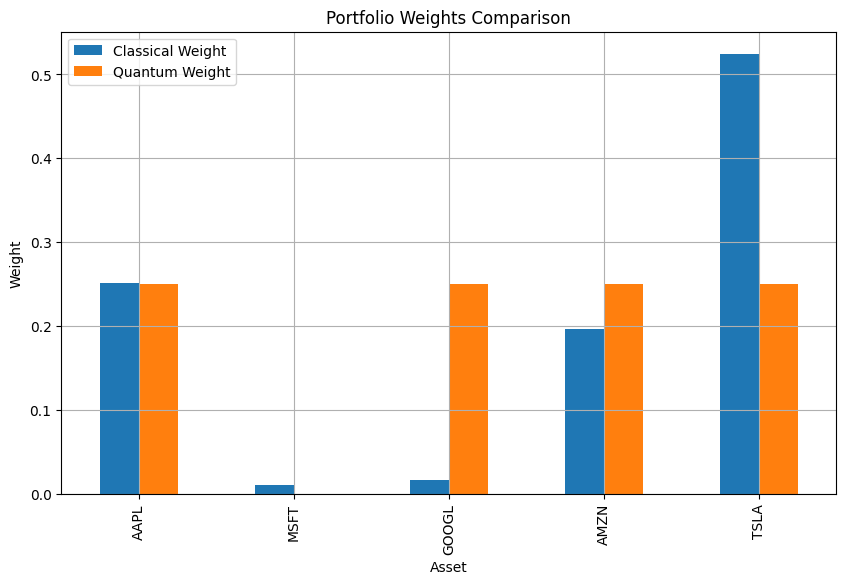

,Classical Weight,Quantum Weight
Asset,,
AAPL,0.251313,0.25
MSFT,0.010491,0.00
GOOGL,0.016650,0.25
AMZN,0.196859,0.25
TSLA,0.524686,0.25


In [8]:
# Classical Optimal Weights
classical_weights = weights_record[max_sharpe_idx]

# Quantum Selection (binary, 1 if asset selected)
quantum_selection = result.x

# Normalize quantum weights (equal weights for selected assets)
selected_count = sum(quantum_selection)
quantum_weights = [1/selected_count if val > 0.5 else 0 for val in quantum_selection]

# Create a comparison dataframe
comparison_df = pd.DataFrame({
    'Asset': tickers,
    'Classical Weight': classical_weights,
    'Quantum Weight': quantum_weights
})

comparison_df.set_index('Asset', inplace=True)
comparison_df.plot(kind='bar', figsize=(10,6), title='Portfolio Weights Comparison')
plt.ylabel('Weight')
plt.grid(True)
plt.show()

comparison_df

# Step 3.2: Performance Metrics

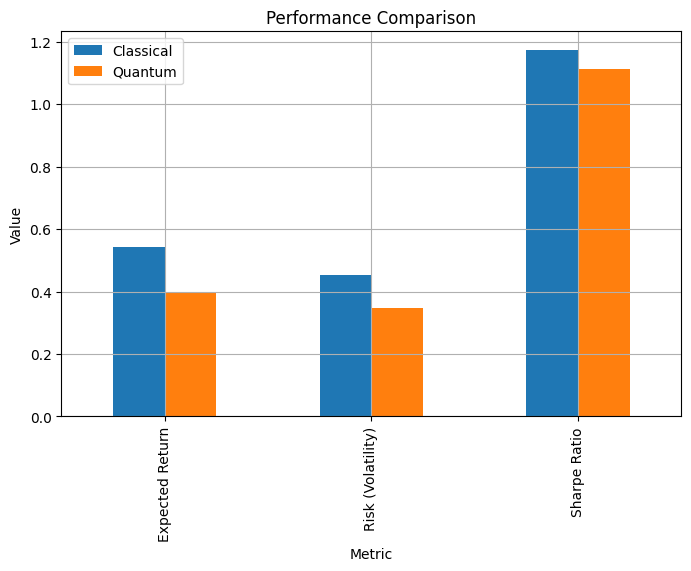

,Classical,Quantum
Metric,,
Expected Return,0.541233,0.395921
Risk (Volatility),0.452594,0.347224
Sharpe Ratio,1.173750,1.111446


In [9]:
def compute_portfolio_metrics(weights, mean_returns, cov_matrix, risk_free_rate=0.01):
    annual_return = np.sum(mean_returns * weights) * 252
    annual_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix * 252, weights)))
    sharpe_ratio = (annual_return - risk_free_rate) / annual_volatility
    return annual_return, annual_volatility, sharpe_ratio

# Classical
classical_ret, classical_risk, classical_sharpe = compute_portfolio_metrics(classical_weights, mean_returns, cov_matrix)

# Quantum
quantum_ret, quantum_risk, quantum_sharpe = compute_portfolio_metrics(np.array(quantum_weights), mean_returns, cov_matrix)

# Summary
performance_df = pd.DataFrame({
    'Metric': ['Expected Return', 'Risk (Volatility)', 'Sharpe Ratio'],
    'Classical': [classical_ret, classical_risk, classical_sharpe],
    'Quantum': [quantum_ret, quantum_risk, quantum_sharpe]
})

performance_df.set_index('Metric', inplace=True)
performance_df.plot(kind='bar', figsize=(8,5), title='Performance Comparison')
plt.ylabel('Value')
plt.grid(True)
plt.show()

performance_df

🟡 Why Not Unequal Weights?

Because:
	•	The QUBO-based quantum formulation is not a continuous optimization over weights.
	•	It’s a discrete optimization: which subset of assets gives the best tradeoff between risk and return.
	•	Weight equality is a post-processing choice — because QAOA only tells us which assets to pick.

⸻

✅ If You Want Unequal Weights in Quantum:

You’d need a more advanced quantum formulation that either:
	1.	Combines selection + continuous weights (hybrid model — tricky and still under research)
	2.	Or you could:
	•	Use quantum to select the asset subset, then
	•	Apply classical mean-variance optimization on just those assets to get unequal weights


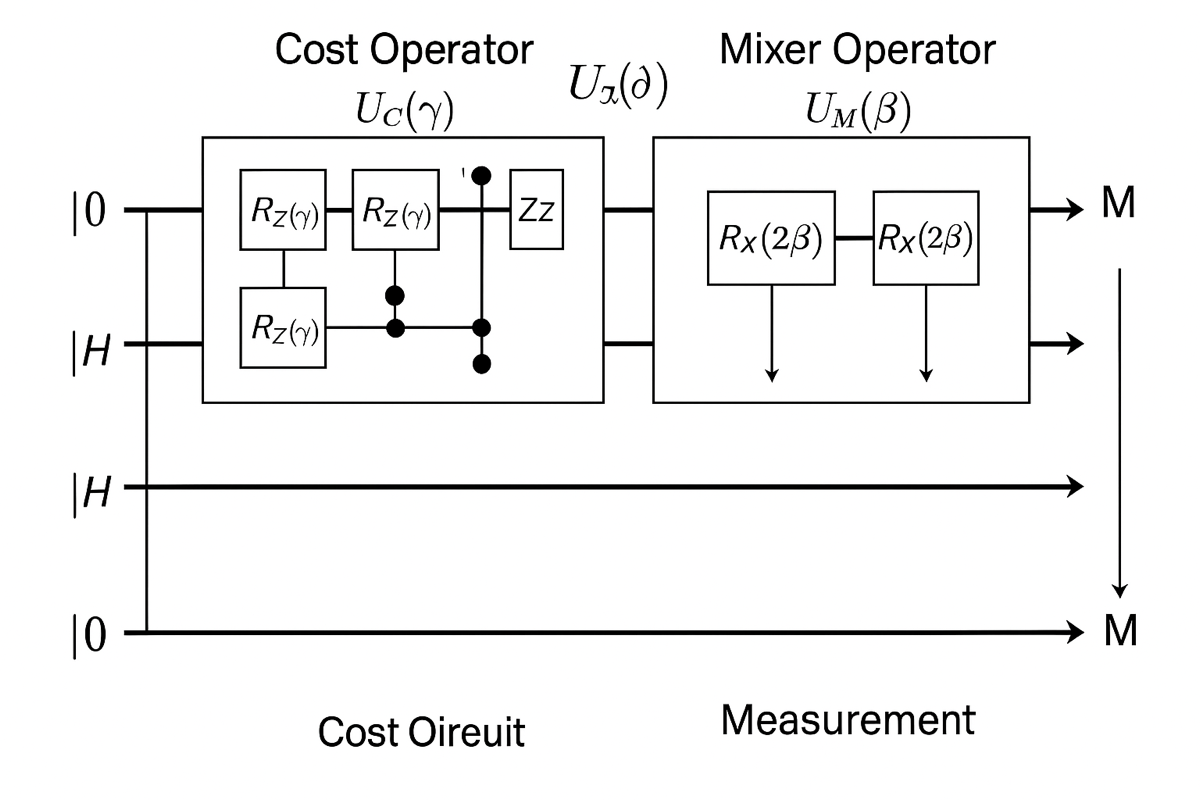

Imagine This Circuit as a Recipe for Finding the Best Portfolio

Each horizontal line in the image represents a qubit — in our case, each one stands for a stock in your portfolio (like Apple, Microsoft, etc.).

Let’s walk left to right:

⸻

🟩 Step 1: Hadamard Gates (H) – “Try Everything”
	•	These gates create a superposition, meaning the quantum computer tries all combinations of stocks at once — include/exclude, yes/no.
	•	It’s like testing every possible portfolio at the same time.

⸻

🟣 Step 2: Cost Operator (U_C(γ)) – “Score Each Portfolio”
	•	This is the problem-specific part: it uses information about returns and risk.
	•	It applies special gates like RZ and Controlled-Z to “rotate” the quantum state based on how good or bad each portfolio is.
	•	Think of it like penalizing risky combinations and rewarding profitable ones.

⸻

🔄 Step 3: Mixer Operator (U_M(β)) – “Shake Things Up”
	•	These gates help the algorithm explore better combinations by mixing or flipping qubit values.
	•	If one configuration isn’t great, this step nudges the system to try a nearby one.

⸻

📏 Step 4: Measurement – “Read the Final Answer”
	•	At the end, the quantum computer measures the qubits, giving a binary string like 10101.
	•	That string tells us which stocks to include in the optimized portfolio.

⸻

🧩 Summary in Plain Words:

“This circuit creates all possible portfolios, scores them based on risk and return, explores better ones, and then gives us the best one it found — all powered by quantum logic.”

Even though quantum has capability to use superposition why take binary into consideration.

 quantum computing works in superposition, where qubits can represent both 0 and 1 at the same time. So, it feels natural to wonder why we end up with only binary decisions in problems like portfolio optimization.

explanation:

1. The Problem Itself Is Binary (Classically Defined)

In your portfolio selection model, the question is:

Should I include this asset or not?

That’s a binary decision:
	•	1 = select the asset
	•	0 = don’t select it

So we intentionally model it as a Binary Optimization Problem. This is where quantum algorithms like QAOA or VQE are particularly good — they solve problems defined on binary variables.



🧪 2. Quantum Algorithms Explore Many Combinations (Using Superposition)

Even though the final answer is binary (0 or 1 for each asset), quantum algorithms explore all combinations of those 0s and 1s in parallel using superposition.

So internally, QAOA does use superposition to:
	•	Search through the entire solution space (all possible combinations)
	•	Find the best combination according to the objective function (risk-return tradeoff)

But once you measure the quantum state, you get a single binary outcome — which is the optimal (or near-optimal) portfolio.





**WORKING OF QAOA**



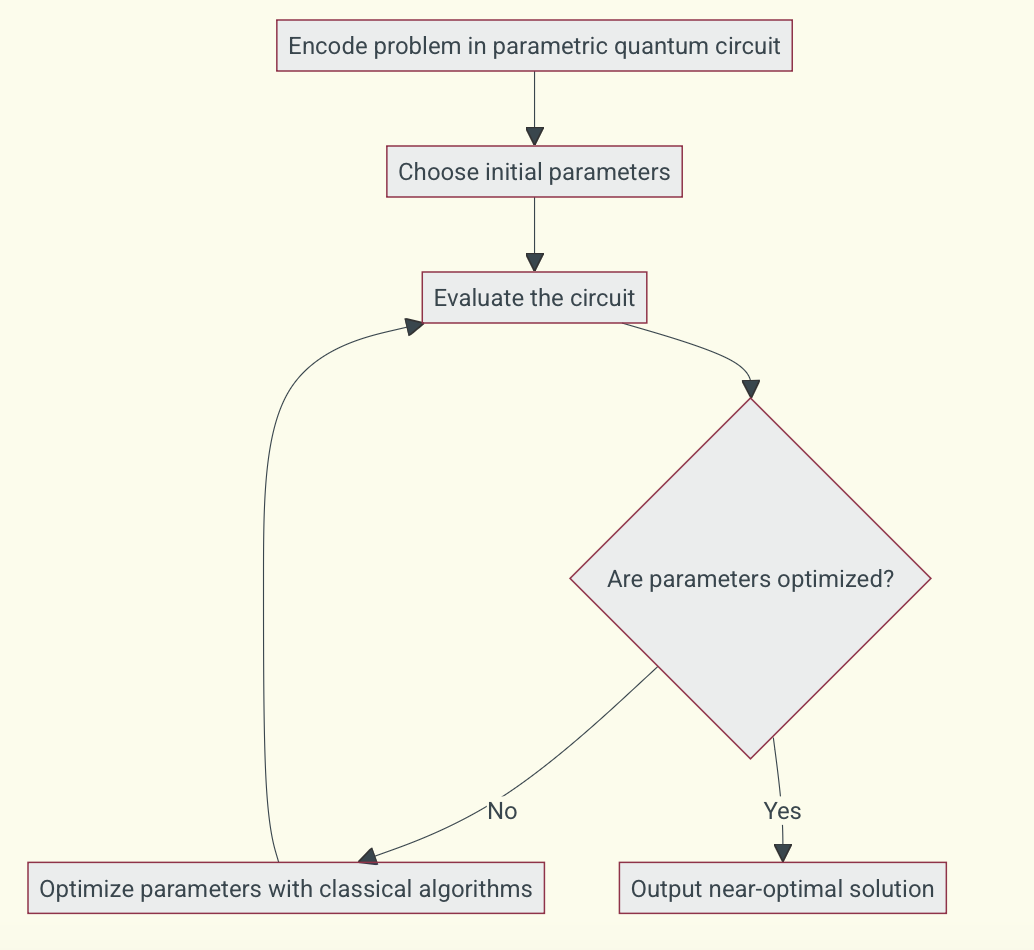